<a href="https://colab.research.google.com/github/Seeethy/The-Martingale-betting-system/blob/main/Martingale_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

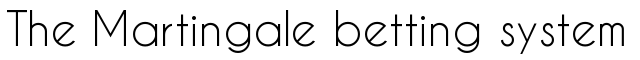

**A martingale betting strategy** was found in 18-century. Its still very popular nowadays among people who make bets. This strategy was at first designed for a simple "toss a coin" game. If a flipped coin came up as heads - player wins, if it comes as tails - player losses. 

**This strategy has got 3 key ideas:**

  1) Player starts with a certain bet
 
  2) Player is multiplying next bet by 2 after every loss.

  3) If a player wins he resets the value of the next bet.

Lets check that strategy in practise by making an experiment. A player will start playing with 100 dolars by betting 1 dolar per game. In reality, if a player plays for example a roulette - he has less winning chance than 50% (48.60% - european roulette, 47.4% - american roulette). Cassinos also usually restrict how many games you can play at a certain table and the maximal bet which you can make. For this experiment we will ignore this and make a simulation of a a random game which seems to be ideal for a player. Lets see what happens...

In [1326]:
import random
import matplotlib.pyplot as plt
import math as m
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker
import numpy as np

def game():
  coin = ['heads', 'tails']
  result = random.choice(coin)
  if result == 'heads':
    game_status = 'win'
  if result == 'tails':
    game_status = 'loss'
  return game_status

deposit = 100
bet = 1
bet_list = []
deposit_list = []
game_counter = 0
game_counter_list = []
bet_list.append(bet)
deposit_list.append(deposit)
game_counter_list.append(game_counter)


while game_counter <= 1000000:
  #print(deposit - bet)
  deposit = deposit - bet 
  game_output = game()

  if game_output == 'win':
    #print('win')
    deposit += bet*2
    bet = 1
    #print("deposit after win",deposit)

  else: # if game_output == 'loss':
    #print('loss')
    #print("deposit after loss",deposit)
    bet = bet * 2
    if bet > deposit: # if a player cannot afford to double a bet - he goes all in
     bet = deposit

  bet_list.append(bet)
  deposit_list.append(deposit)
  game_counter +=1
  game_counter_list.append(game_counter)
  if deposit <=0:
    break

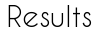

As you can see in graph below - its impossible in long term not to lose money. 
Every simulation will get the same effect, the question is - when will the series of losses happen? 

The idea of Martingale system may seem intresing at first glance, but in real world its really dangerous to follow this idea. 

This is why:
  
  1) Player with an infinite amount of money does not exist.

  2) If a player gets a series of X loses, the next loss probability is still 50%.

  3) On a certain point bet value will be higher than deposit value if we will keep lossing

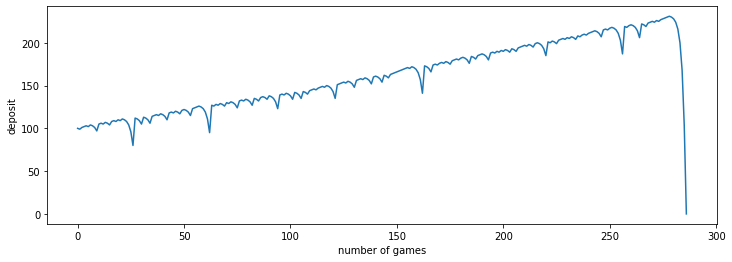

In [1327]:
plt.plot(game_counter_list, deposit_list)
plt.xlabel("number of games")
plt.ylabel("deposit")
plt.rcParams["figure.figsize"] = (12,4)
plt.show()

In [1328]:
print("last deposit values: ",deposit_list[-10:])
print("last bet values: ", bet_list[-10:])

last deposit values:  [230, 231, 230, 228, 224, 216, 200, 168, 104, 0]
last bet values:  [1, 1, 2, 4, 8, 16, 32, 64, 104, 0]


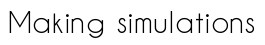

We can't make a judgement about this strategy based on a single event. 
Lets make simulations with different ammount of players and games to see if the result is going to be simmilar.

For this simulations we will make an assumption that:
1.   Player who ends up playing with less money than at the beggining is a loser.
2.   Player who has more money at the end than at the beggining is a winner.




In [1325]:
import pandas as pd

def single_simulation(): # function which simulates games history of a single player. 
  
  deposit = 100000
  global starting_deposit
  starting_deposit = deposit
  bet = 1
  game_counter = 0
  global last_value_of_deposit
  last_value_of_deposit = 0
  global max_game_counter
  max_game_counter = 100
  while game_counter <= max_game_counter:
    
    deposit = deposit - bet 
    game_output = game()
    
    if game_output == 'win':
      deposit += bet*2
      bet = 1
    else:
      bet = bet * 2
      if bet > deposit: # if a player cannot afford to double a bet - he goes all in
        bet = deposit

    last_value_of_deposit = deposit
    game_counter +=1

    if deposit <=0: 
      break
  return last_value_of_deposit # we are returning the value of deposit that a single player ends with

lvod_list = [] # list which stores players last deposit values
number_of_players = 1000000 # variable storing how much players we want to create for a simulation
for i in range(number_of_players):
  lvod_list.append(single_simulation())


single_simulation()
win_or_lose = [] 
change_list = []
winning_players = []
total_loss = []
mean = 0
for i in range(len(lvod_list)):
  change = (lvod_list[i] - starting_deposit) / starting_deposit
  #print(change)
  percentage = "{:.5%}".format(change)
  change_list.append(percentage)
  if change == -1.0:
    total_loss.append(change)
  if change > 0.0:
    winning_players.append(change)
    win_or_lose.append("WIN")
  else:
    win_or_lose.append("LOSE")
  mean+=change
mean = mean / number_of_players

df = pd.DataFrame({'deposit': lvod_list,
                 'rate of return': change_list,
                  'Win or lose': win_or_lose})


df = df.rename_axis('player ID') #renaming index column name
df.columns.name = df.index.name 
df.index.name = None
df.index = np.arange(1, len(df)+1) #making all column names stand in the same line
df 



player ID,deposit,rate of return,Win or lose
1,100052,0.05200%,WIN
2,100052,0.05200%,WIN
3,100048,0.04800%,WIN
4,100055,0.05500%,WIN
5,100045,0.04500%,WIN
...,...,...,...
999996,100042,0.04200%,WIN
999997,100044,0.04400%,WIN
999998,100049,0.04900%,WIN
999999,100051,0.05100%,WIN


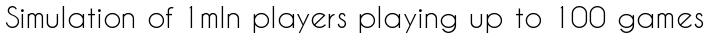

In [1329]:
print("\n")
percentage_of_wins = "{:.2%}".format(len(winning_players)/number_of_players)
percentage_of_return = "{:.5%}".format(mean)
percentage_of_total_losses = "{:.2%}".format(len(total_loss)/number_of_players)

print("From",number_of_players,"players", len(winning_players), "has been succesfull. \n\nWins represent", percentage_of_wins,"of the games.\n\nPercentage of -100% rate of return games:",percentage_of_total_losses,"\n\nAverage rate of return:",percentage_of_return) 




From 1000000 players 983736 has been succesfull. 

Wins represent 98.37% of the games.

Percentage of -100% rate of return games: 0.03% 

Average rate of return: 0.00159%


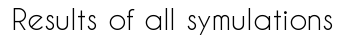

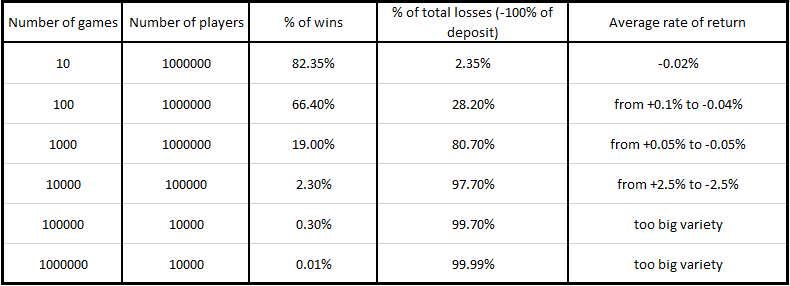

As we can see with increasing in number of games:
1.   standard deviation increases
2.   Percent of players losing all their deposit increases
3.   Percent of players who won decreases

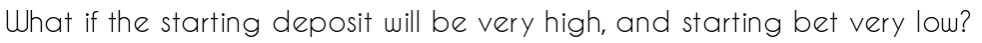

For example if the players will start with 100k starting deposit and 1 dollar starting bet and they play 1k games - the majority of them (around 98%) should be winning. The profit should be around 50 dolars in most cases. That is why most of the cassinos has got some restrictions like: maximal bet, maximal amount of games at one table etc.

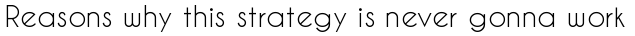

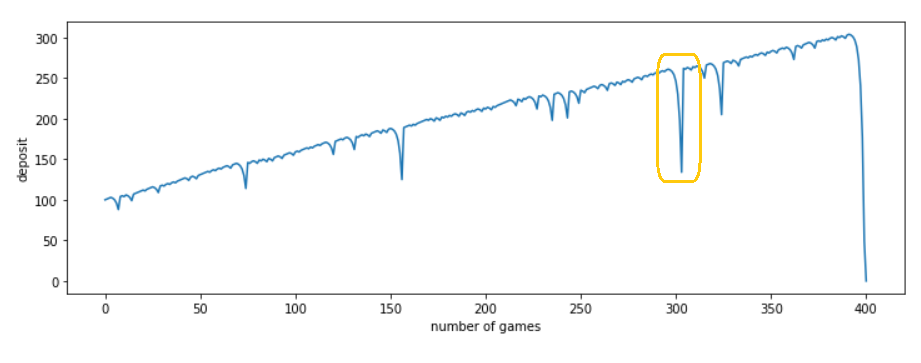

On the graph above you can see a yellow mark at a certain place. It shows that during the game you're risking all your money by doubling your bets many many times - for an eventual win of a bet which you have started with. In this case its just a 1 dollar.

1＄ → 2＄ → 4＄ → 8＄ → 16＄ → 32＄

Sum of all bets in the example above is equal to 63.
The eventual win with 32 dollar bet would give us 1 dollar profit.

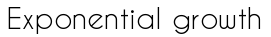

Bets grow exponentially and that is the main problem for a player with a limited budget. 


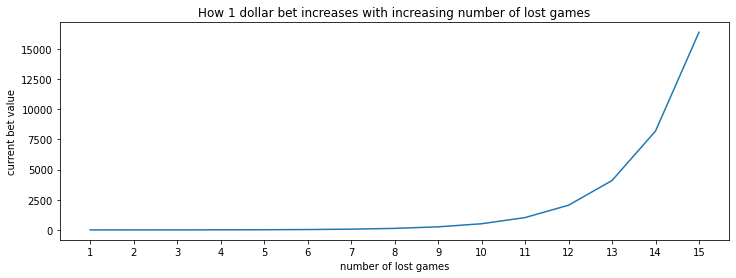

In [1330]:
y_pyplot = []
for n in range(0,15,1):
  y_pyplot.append(2**n)

x_pyplot = np.arange(1,16)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(0, 1000000,2500))
ax.xaxis.set_ticks(np.arange(0, 16,1))

plt.plot(x_pyplot,y_pyplot)
plt.title("How 1 dollar bet increases with increasing number of lost games")
plt.xlabel("number of lost games")
plt.ylabel("current bet value")
plt.show()

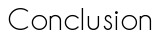

A martingale betting system works fine only in theory. Using this strategy may very likely destroy deposit that you play with. People tend to underestimate odds that something with a low probability will happen.
Chances that flipped coin will show the same side 6 or more times in a row is much more likely to happen, than many of us belive. If some action has any chance of occuring, then it will happen (in the long run obviously).